# Lab 3: Les histogrammes

## Import des bibliothèques 

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

## Définition des fonctions 

**Prétraitement et affichage: Définition de la fonction de plots qui affichera les graphes de la même manière sans avoir à réécrire les paramètres**

In [54]:
def plot_image(image_1, image_2,title_1= "Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.axis("off")
    plt.show()

**Histogrammes: Définition de la fonction qui trace les histogrammes de deux images**

In [59]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.grid()
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.grid()
    plt.xlabel('intensity')
    plt.show()


## Toy example

**Dans un premier temps nous testons l'affichage d'une matrice en noir et blanc chaque valeur represente l'intensité de la clareté de gris 0 noir, 1 gris et 2 blanc**

**puis nous retestons avec l'image de femme**

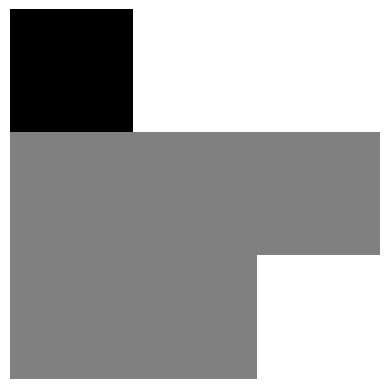

image de toy [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [12]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image,cmap="gray")
plt.axis("off")
plt.show()
print("image de toy",toy_image)

**To DO**: histogramme des fréquences x= 0 à 5 et le deuxième vecteur représente la fréquence des nombres de x puis on affiche l'histogramme

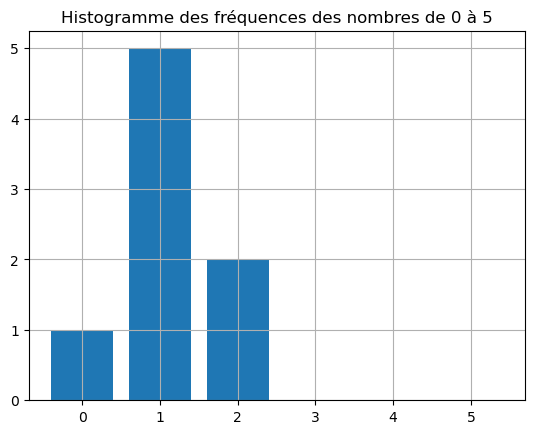

In [16]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.title('Histogramme des fréquences des nombres de 0 à 5')
plt.grid()
plt.show()


**Biensure en changeant les fréquence on change le resultat de l'histogramme**

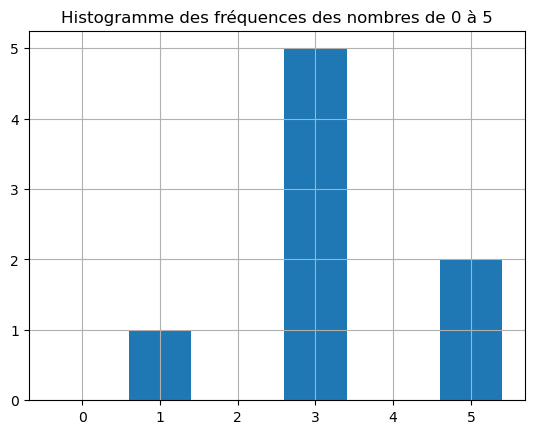

In [17]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.title('Histogramme des fréquences des nombres de 0 à 5')
plt.grid()
plt.show()

## Histogramme de niveau de gris 

**Une image peut être divisée en deux aspects: Contrast (clair foncé) et colorimétrie (De quelle couleur s'agit il?)**


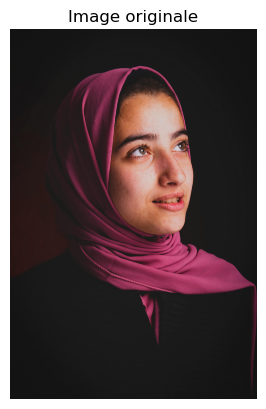

In [38]:
femme = cv2.imread("image1.jpg")
plt.imshow(cv2.cvtColor(femme,cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis("off")
plt.show()

**Dans cette Etape nous lisons une image en niveaux de gris à l'aide de open cv puis nous l'affichons à l'aide de la bibliothèque pyplot en gris**

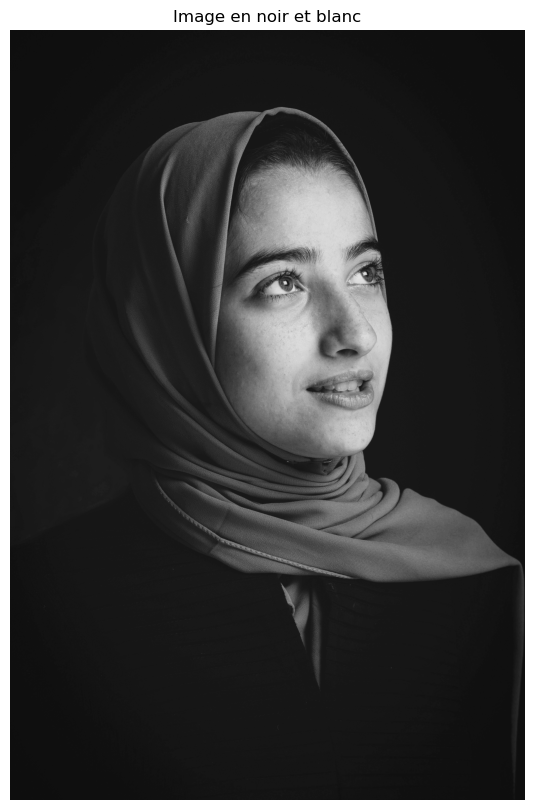

In [25]:
woman = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Image en noir et blanc")
plt.imshow(woman,cmap="gray")
plt.show()

**Calculer les fréquences de l'histogramme de niveaux de gris de l'image**

In [20]:
hist = cv2.calcHist([woman],[0],None,[256],[0,256])

**Nous traçons maintenant cet histogramme**

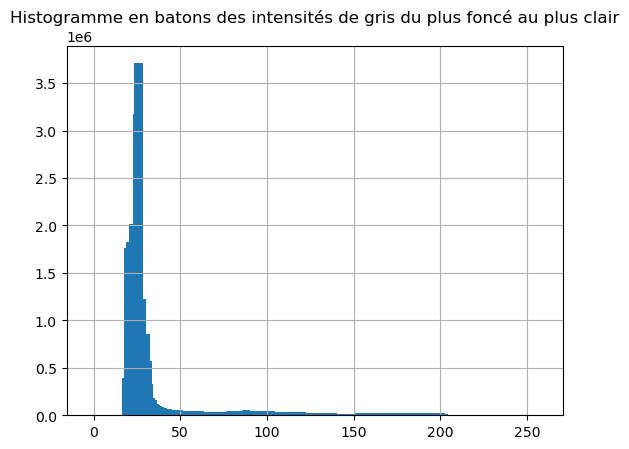

In [24]:
intesity_values = np.array([x for x in range(hist.shape[0])])
plt.grid()
plt.title("Histogramme en batons des intensités de gris du plus foncé au plus clair")
plt.bar(intesity_values,hist[:,0], width=5)
plt.show()

Ce résultat implique qu'il y a plus de couleurs foncées que clair car les valeurs les plus fréquentes sont inférieirs à 40

**En normalisant le résultat nous obtenons forcémment une valeur inferieur à 1 qui n'est t'autre que la probabilité de masse**
Pour celà on divise par la taille totale (superficie = nb pixels de longeur x nb pixels de largeur)

In [30]:
PMF = hist / (woman.shape[0] * woman.shape[1])


Le tracé de la fonction continue associée se rapporte aux lois de probabilités mais pas de la loi normale car il y a des corrélation des ombres et des lumières 

En analyse de données ceci represente le KDE

La normalisation respecte les données des fréquences et ne rapporte que leurs trace par une fonction continue

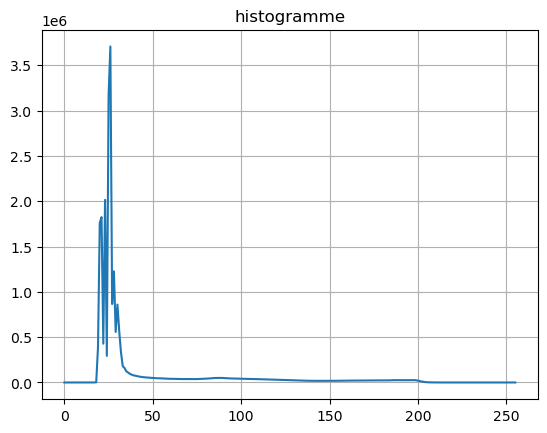

In [32]:
plt.plot(intesity_values,hist)
plt.grid()
plt.title("histogramme")
plt.show()

**Tout comme pour l'intentité des couleurs il est possible de tracer l'histogramme des chaines de couleurs**

**Ici Nous lisons une image en RGB et nous la rediffusons en utilisant les mêmes chaines de couleurs (nous obtenons l'image de base car c'est une image en RGB et non pas en CMYK ou autre type de channeling)**

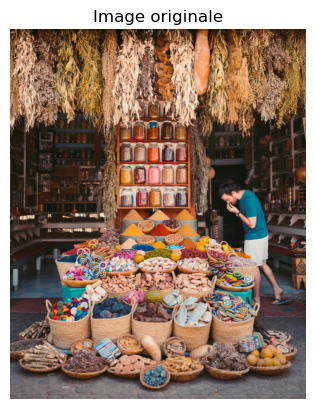

In [42]:
epice = cv2.imread("image2.jpg")
plt.imshow(cv2.cvtColor(epice,cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis("off")
plt.show()

**Si nous faisons une boucle sur les couleurs rouge vert et bleu nous pouvons tracer les histogrammes de ces 3 couleurs dans l'image de base**

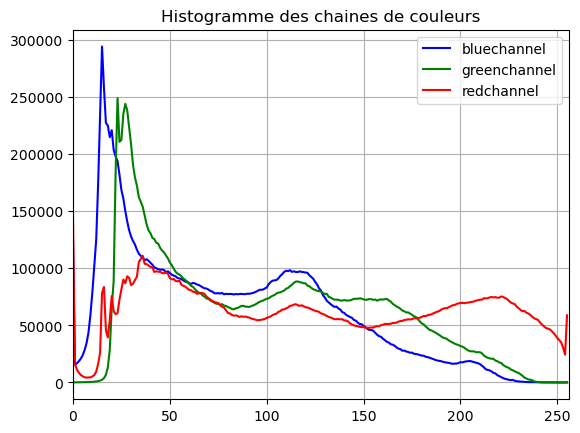

In [64]:
color = ('blue','green','red')
for i, col in enumerate(color):
    histr = cv2.calcHist([epice],[i],None,[256],[0,256])
    plt.plot(intesity_values,histr,color=col,label=col+"channel")
    plt.xlim([0,256])
plt.legend()
plt.grid()
plt.title("Histogramme des chaines de couleurs")
plt.show()

**Les tons bleus et verts ont tendances à modeliser les couleurs les lus sombres de l'image pierre bleu est très sombre**

**La couleur rouge est celle qui est la plus présente dans les zones les plus claires de l'image (le rouge est très mis en valeurset c'est lui qu'on remarque en premier)**

## Image négative

**L'image négative inverse l'histogramme des fréquances ainsi que les zones d'ombre et de clarté d'une image**

In [47]:
neg_epice= -1 * epice + 255
print("epice",epice)

epice [[[ 19  29  39]
  [ 17  29  41]
  [ 16  28  40]
  ...
  [ 11  24  50]
  [ 17  30  62]
  [ 17  30  62]]

 [[ 20  30  40]
  [ 19  31  43]
  [ 18  30  42]
  ...
  [ 14  27  53]
  [ 18  32  61]
  [ 18  32  61]]

 [[ 22  32  42]
  [ 21  33  45]
  [ 20  32  44]
  ...
  [ 16  29  55]
  [ 19  33  61]
  [ 19  33  61]]

 ...

 [[115 115 129]
  [114 114 128]
  [114 114 128]
  ...
  [ 98  95 110]
  [ 89  86 101]
  [ 89  86 101]]

 [[108 110 121]
  [109 111 122]
  [109 111 122]
  ...
  [ 96  92 104]
  [ 93  89 101]
  [ 93  89 101]]

 [[108 110 121]
  [109 111 122]
  [109 111 122]
  ...
  [ 96  92 104]
  [ 93  89 101]
  [ 93  89 101]]]


In [48]:
print("image negative d'epice",neg_epice)

image negative d'epice [[[236 226 216]
  [238 226 214]
  [239 227 215]
  ...
  [244 231 205]
  [238 225 193]
  [238 225 193]]

 [[235 225 215]
  [236 224 212]
  [237 225 213]
  ...
  [241 228 202]
  [237 223 194]
  [237 223 194]]

 [[233 223 213]
  [234 222 210]
  [235 223 211]
  ...
  [239 226 200]
  [236 222 194]
  [236 222 194]]

 ...

 [[140 140 126]
  [141 141 127]
  [141 141 127]
  ...
  [157 160 145]
  [166 169 154]
  [166 169 154]]

 [[147 145 134]
  [146 144 133]
  [146 144 133]
  ...
  [159 163 151]
  [162 166 154]
  [162 166 154]]

 [[147 145 134]
  [146 144 133]
  [146 144 133]
  ...
  [159 163 151]
  [162 166 154]
  [162 166 154]]]


**Il est temps de visualiser l'impacte de l'inverse sur les images**

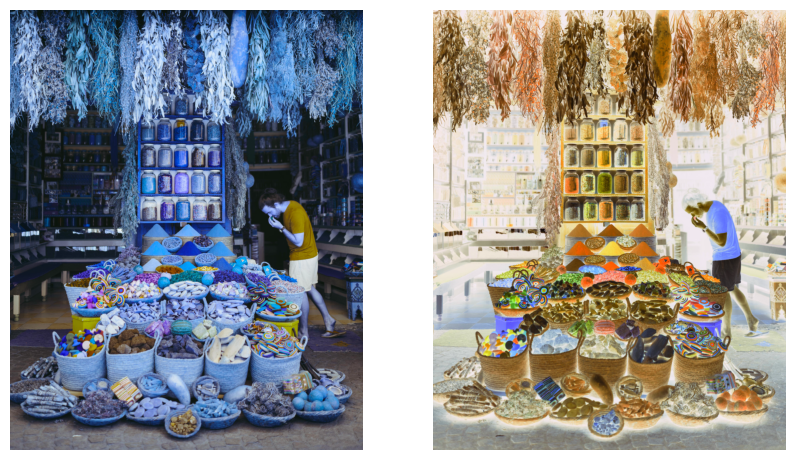

epice [[[ 19  29  39]
  [ 17  29  41]
  [ 16  28  40]
  ...
  [ 11  24  50]
  [ 17  30  62]
  [ 17  30  62]]

 [[ 20  30  40]
  [ 19  31  43]
  [ 18  30  42]
  ...
  [ 14  27  53]
  [ 18  32  61]
  [ 18  32  61]]

 [[ 22  32  42]
  [ 21  33  45]
  [ 20  32  44]
  ...
  [ 16  29  55]
  [ 19  33  61]
  [ 19  33  61]]

 ...

 [[115 115 129]
  [114 114 128]
  [114 114 128]
  ...
  [ 98  95 110]
  [ 89  86 101]
  [ 89  86 101]]

 [[108 110 121]
  [109 111 122]
  [109 111 122]
  ...
  [ 96  92 104]
  [ 93  89 101]
  [ 93  89 101]]

 [[108 110 121]
  [109 111 122]
  [109 111 122]
  ...
  [ 96  92 104]
  [ 93  89 101]
  [ 93  89 101]]]


In [51]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(epice,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(neg_epice,cmap="gray")
plt.axis("off")
plt.show()
print("epice",epice)

**Il est possible de dire que les deux images sont complementaires par rapport à 256 si on somme les deux matrices on obtient une image d'une seule couleur en entier **

Il est possible d'appliqer cette transformation à plusieurs dommaines comme le monde du cinéma et de la photographie pro mais specialement dans le dommaine de l'imagerie médicale.

## Luminosité et ajustement du contrast

Le contrast a donné le mot contraire et c'est la distance entre la couleur la plus foncée et la couleur la plus clair (amplitude)

le contrast et la luminosité peuvent être modifiés séparément (mais pas dans le cas de la photographie pro pour avoir un résultat harmonieux) à travers de deux paramètres 

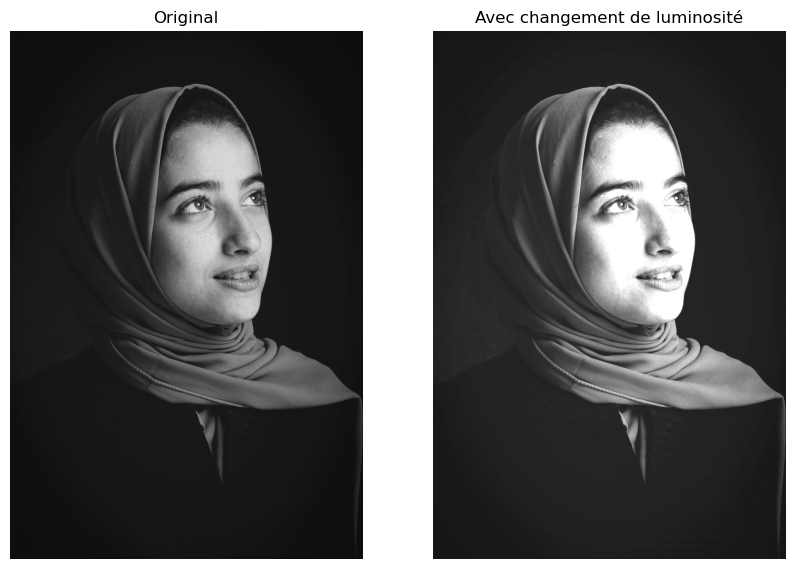

In [55]:
alpha = 1 # contrast
beta = 100 #luminosité
new_image = cv2.convertScaleAbs(woman,alpha=alpha,beta=beta)
plot_image(woman,new_image,"Original","Avec changement de luminosité")

**Il est clair que l'image avec augmentation de luminosité est plus lumineuse**

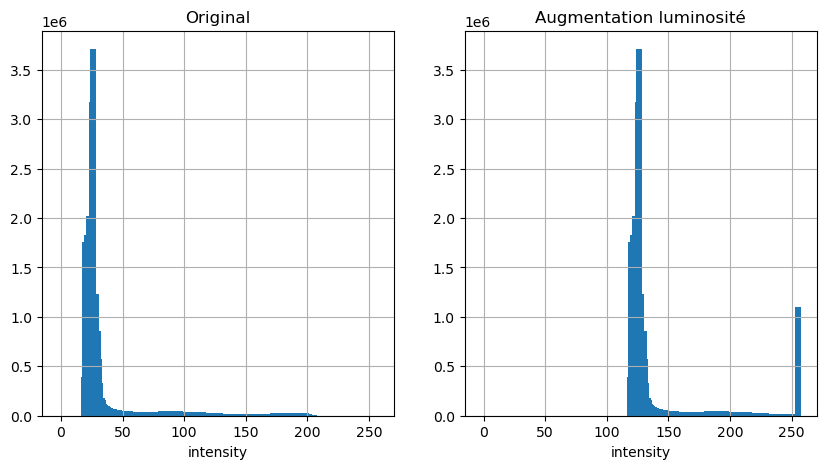

In [60]:
plt.figure(figsize=(10,5))
plot_hist(woman,new_image,"Original","Augmentation luminosité")


**De même pour le contrast nous pouvons le modifier à travers la valeurs alpha**

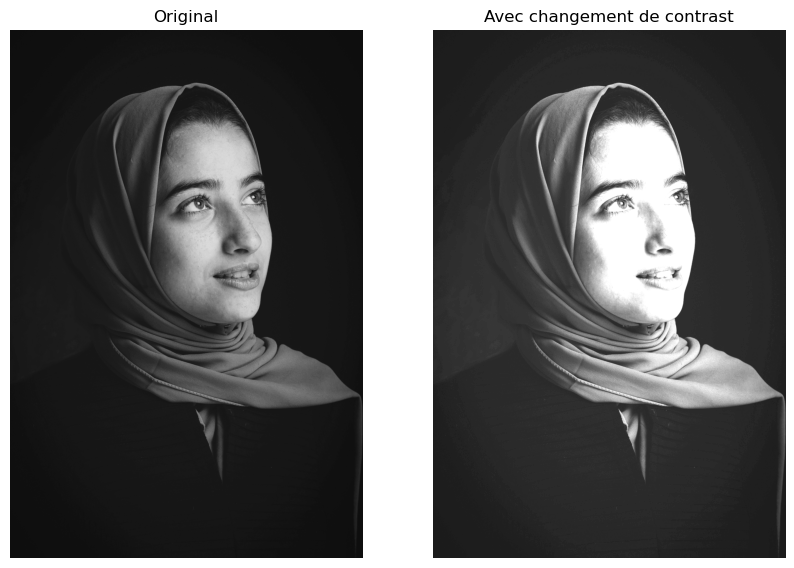

In [63]:
alpha = 2 # contrast
beta = 0 #luminosité
new_image = cv2.convertScaleAbs(woman,alpha=alpha,beta=beta)
plot_image(woman,new_image,"Original","Avec changement de contrast")

Il est clair que les zones plus claires deviennent plus claires et les zones plus foncées deviennent plus foncées => c'est l'amplitude entre la couleur la plus foncée et la plus claire qui augmente ainsi les démarcations sont plus nettes et les changements de couleurs plus rapides 

## Histogramme égalisé

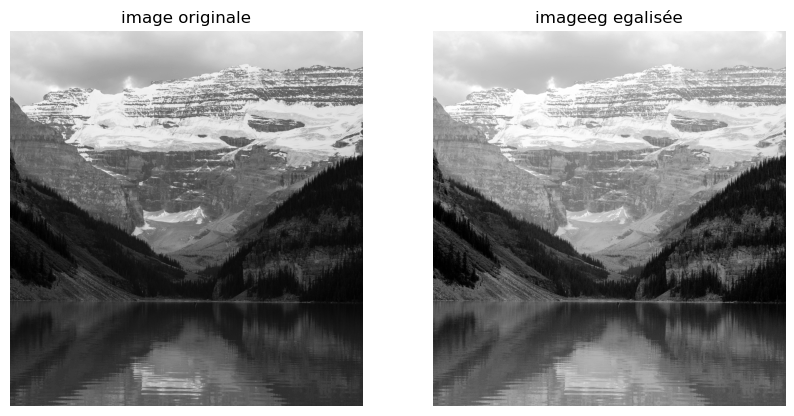

In [69]:
alpes = cv2.imread("image5.jpg",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(alpes)
plot_image(alpes,new_image,"image originale","imageeg egalisée")

**L'image égalisée a moins de détails car l'égalisation aplatit et égalise (réduit le contraste et donc rapprocheles gris de l'histogramme pour qu'ils fassent une couleur plus proche)**

**Par exemple sur l'eau il y a le même gris et moins de variations et donc on perd les détails**

**On remarque que l'image égalisée est plus dans clair ceci laisse à croire que l'égalisation a tiré les couleurs foncées vers le clair et non l'inverse**

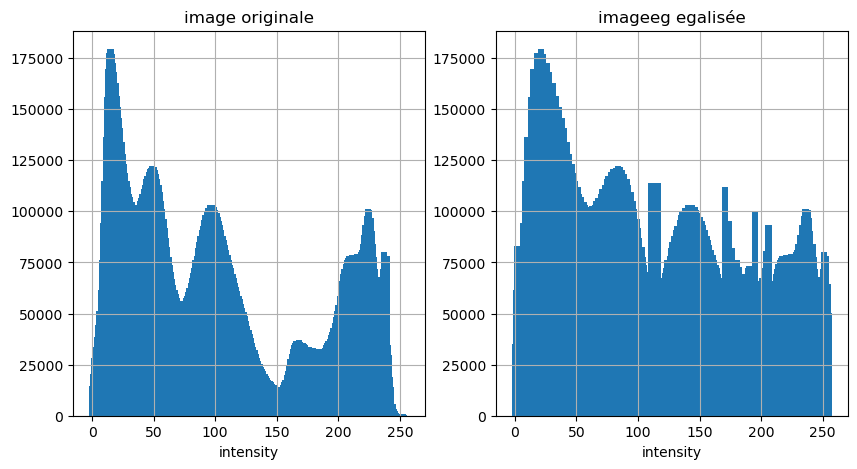

In [70]:
plt.figure(figsize=(10,5))
plot_hist(alpes,new_image,"image originale","imageeg egalisée")

**L'histogramme confirme que l'égalisation élimine la diversité du spectre, diminue le contraste les valeurs égalisées sont toutes hautes** 

**les rectangles indiquent une modifications numériques sur l'image originale**

**L'égalisation augmente la taille des pixels**

## Thresholding et segmentation simple

In [77]:
def thresholding(input_img,threshold,max_value=255,min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)

    for i in range(N):
        for j in range(M):
            if input_img[i,j]>threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
    return image_out

In [79]:
toy_image
threshold=1
max_value=2
min_value=0
threshold_toy = thresholding(toy_image,threshold,max_value,min_value)

In [80]:
threshold_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

Text(0.5, 1.0, 'Threshold image')

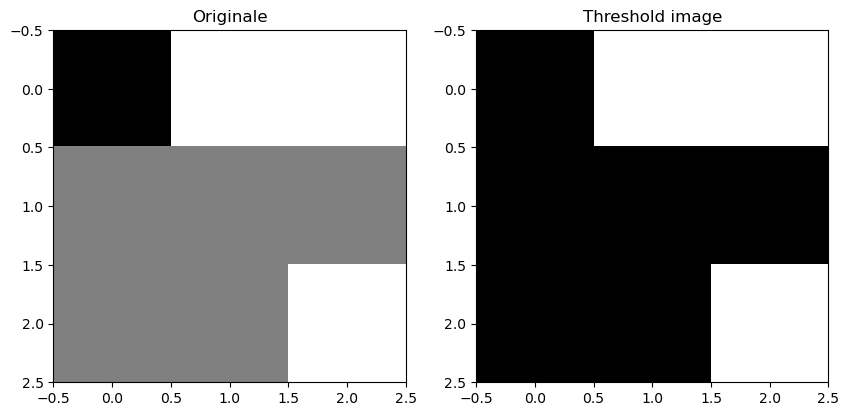

In [82]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(toy_image,cmap="gray")
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(threshold_toy,cmap="gray")
plt.title("Threshold image")

**Le threshold est un filtre à seuil qui arrondi au max à partir d'un certain seuil et au min si la valeur est inferieur au seuil, l'image est en noir soit blanc sans les gris**

### Application 

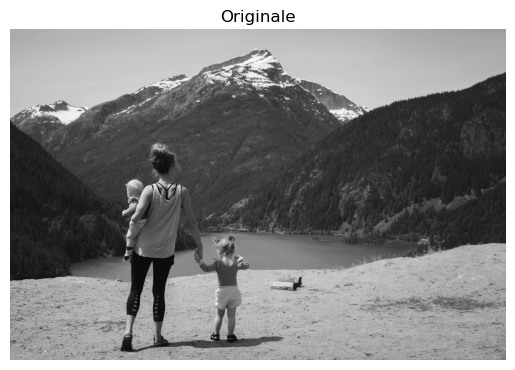

In [87]:
image = cv2.imread("image3.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")
plt.title("Originale")
plt.axis("off")
plt.show()

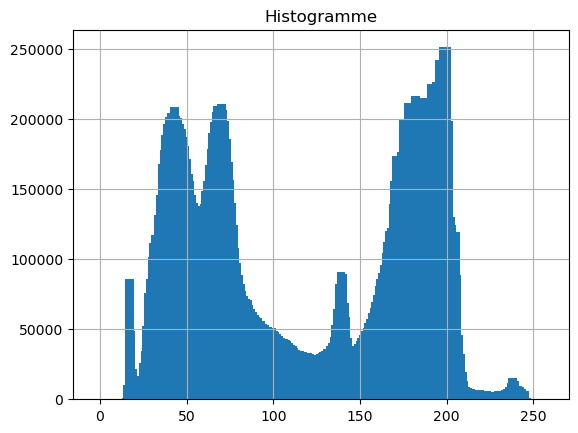

In [93]:
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.bar(intesity_values,hist[:,0],width=5)
plt.grid()
plt.title("Histogramme")
plt.show()

**Les pics indiquent les couleurs prédominantes**

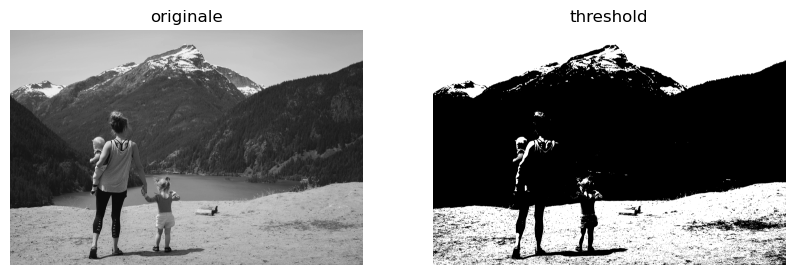

In [99]:
threshold = 150
max_value = 255
min_value = 0
new_image = thresholding(image,threshold,max_value,min_value)
plot_image(image,new_image,"originale","threshold")

**Un threshold très haut donnera une image très sombre: le seuil de décision sera trop élévé et enverra les pixel en noir:0**

**À l'inverse un thresholding trop bas les pixels seront majoritèrement mis à 1 donc seront blancs**

**En se basant sur l'histogramme j'ai choisi une valeur qui divise bien en 2 pour quand même distinguer quelques details**

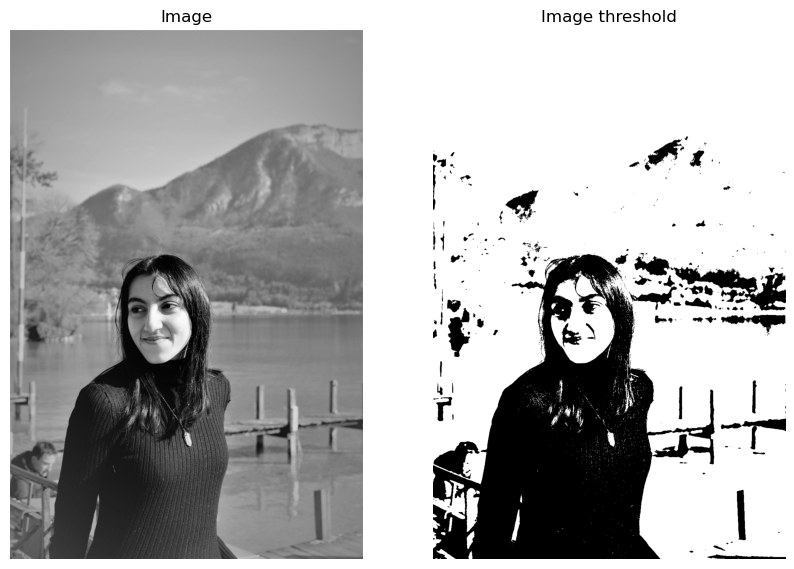

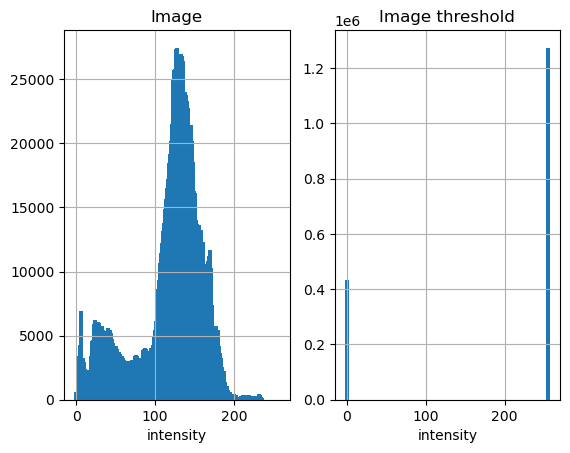

In [108]:
ret,tresh = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Image","Image threshold")
plot_hist(image,new_image,"Image","Image threshold")


**L'image originale a une variation visible et continue! il existe plusieurs coloris et plusieurs intensitées**

**Dans la deuxième image les couleurs sont soit noir soit blanc**